## Cubic spline interpolation
---
Given samples:
$$ \{(x_0, y_0), (x_1, y_1), ..., (x_n, y_n)\} $$
  
We are looking for spline function that looks like this:
$$ f(x) = \begin{cases}
    f_1(x) & \text{for } x \in (-\infty, x_1) \\
    \vdots \\
    f_k(x) & \text{for } x \in [x_{k-1}, x_k) \\
    \vdots \\
    f_n(x) & \text{for } x \in [x_{n-1}, x_n) 
\end{cases}
$$
  
Where:
$$ f_k(x) = a_k x^3 + b_k x^2 + c_k x + d_k $$
  
In order to find these functions we will solve system of linear equations with $4n$ variables:
$$A_{4n \times 4n}X_{4n} = B_{4n}$$
  
Equations are based on four conditions:
1. Each function passes through its respective endpoints
2. First derivatives match at interior points
3. Second derivatives match at interior points
4. Second derivatives vanish at the end points
  
### Condition 1: Each function passes through its respective endpoints
Which corresponds to:
$$ \begin{cases}
    f_k(x_{k-1}) = y_{k-1} \\
    f_k(x_k) = y_k
\end{cases} $$
  
That gives us:
$$ \begin{cases}
    a_k x_{k-1}^3 + b_k x_{k-1}^2 + c_k x_{k-1} + d_k = y_{k-1} \\
    a_k x_{k}^3 + b_k x_{k}^2 + c_k x_{k} + d_k = y_{k}
\end{cases} $$
  
Where:
$$ k \in \{1, 2,..., n\} $$
  
So we end up with matrix $ A_1 $ of size $ (2n \times 4n) $:
$$ A_1 = 
\begin{bmatrix}
    x_{0}^{3} & x_{0}^{2} & x_{0}^{1} & x_{0}^{0} & 0 & 0 & 0 & 0 & \cdots \\
    x_{1}^{3} & x_{1}^{2} & x_{1}^{1} & x_{1}^{0} & 0 & 0 & 0 & 0 & \cdots \\
    0 & 0 & 0 & 0 & x_{1}^{3} & x_{1}^{2} & x_{1}^{1} & x_{1}^{0} & \cdots \\
    0 & 0 & 0 & 0 & x_{2}^{3} & x_{2}^{2} & x_{2}^{1} & x_{2}^{0} & \cdots \\
    \vdots & \vdots & \vdots & \vdots & \vdots & \vdots & \vdots & \vdots & \ddots 
\end{bmatrix}
$$
  
And matrix $ B_1 $ of size $ (2n \times 1) $:
$$ B_1 =
\begin{bmatrix}
    y_0 \\ y_1 \\ y_1 \\ y_2 \\ \vdots
\end{bmatrix}
$$

  
### Condition 2: First derivatives match at interior points
Which corresponds to:
$$ \frac{d}{dx}f_{k}(x_k) = \frac{d}{dx}f_{k+1}(x_k) $$
  
That gives us:
$$ 3 a_k x_k^2 + 2 b_k x_k + c_k + 1 = 3 a_{k+1} x_k^2 + 2 b_{k+1} x_k + c_{k+1} + 1 $$
$$ 3 a_k x_k^2 + 2 b_k x_k + c_k - 3 a_{k+1} x_k^2 - 2 b_{k+1} x_k - c_{k+1} = 0 $$
  
Where:
$$ k \in \{1, 2,..., n-1\} $$
  
So we end up with matrix $ A_2 $ of size $ (n-1 \times 4n) $:
$$ A_2 = 
\begin{bmatrix}
    3x_{1}^{2} & 2x_{1}^{1} & x_{1}^{0} & 0 & -3x_{1}^{2} & -2x_{1}^{1} & -x_{1}^{0} & 0 & 0 & 0 & 0 & 0 & \cdots \\
    0 & 0 & 0 & 0 & 3x_{2}^{2} & 2x_{2}^{1} & x_{2}^{0} & 0 & -3x_{2}^{2} & -2x_{2}^{1} & -x_{2}^{0} & 0 & \cdots \\
    0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 3x_{3}^{2} & 2x_{3}^{1} & x_{3}^{0} & 0 & \cdots \\
    \vdots & \vdots & \vdots & \vdots & \vdots & \vdots & \vdots & \vdots & \vdots & \vdots & \vdots & \vdots & \ddots 
\end{bmatrix}
$$
  
And matrix $ B_2 $ of size $ (n-1 \times 1) $:
$$ B_2 =
\begin{bmatrix}
    0 \\ 0 \\ 0 \\ 0 \\ \vdots
\end{bmatrix}
$$
  
### Condition 3: Second derivatives match at interior points
Which corresponds to:
$$ \frac{d^2}{dx^2}f_{k}(x_k) = \frac{d^2}{dx^2}f_{k+1}(x_k) $$
  
That gives us:
$$ 6 a_k x_k + 2 b_k + 1 = 6 a_{k+1} x_k + 2 b_{k+1} + 1 $$
$$ 6 a_k x_k + 2 b_k - 6 a_{k+1} x_k - 2 b_{k+1} = 0 $$
  
Where:
$$ k \in \{1, 2,..., n-1\} $$
  
So we end up with matrix $ A_3 $ of size $ (n-1 \times 4n) $:
$$ A_3 = 
\begin{bmatrix}
    6x_{1}^{1} & 2x_{1}^{0} & 0 & 0 & -6x_{1}^{1} & -2x_{1}^{0} & 0 & 0 & 0 & 0 & 0 & 0 & \cdots \\
    0 & 0 & 0 & 0 & 6x_{2}^{1} & 2x_{2}^{0} & 0 & 0 & -6x_{2}^{1} & -2x_{2}^{0} & 0 & 0 & \cdots \\
    0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 6x_{3}^{1} & 2x_{3}^{0} & 0 & 0 & \cdots \\
    \vdots & \vdots & \vdots & \vdots & \vdots & \vdots & \vdots & \vdots & \vdots & \vdots & \vdots & \vdots & \ddots 
\end{bmatrix}
$$
  
And matrix $ B_2 $ of size $ (n-1 \times 1) $:
$$ B_3 =
\begin{bmatrix}
    0 \\ 0 \\ 0 \\ 0 \\ \vdots
\end{bmatrix}
$$
  
### Condition 4: Second derivatives vanish at the end points
Which corresponds to:
$$ \begin{cases}
    \frac{d^2}{dx^2}f_{1}(x_0) = 0 \\
    \frac{d^2}{dx^2}f_{n}(x_n) = 0
\end{cases} $$
  
That gives us:
$$ \begin{cases}
    6 a_1 x_0 + 2 b_1 + 1 = 0 \\
    6 a_n x_n + 2 b_n + 1 = 0
\end{cases} $$
  
So we end up with matrix $ A_4 $ of size $ (2 \times 2n) $:
$$ A_4 =
\begin{bmatrix}
    6x_0 & 2 & 1 & 0 & \cdots & 0 & 0 & 0 & 0 \\
    0 & 0 & 0 & 0 & \cdots & 0 & 6x_n & 2 & 1
\end{bmatrix}
$$
  
And matrix $ B_4 $ of size $ (2 \times 1) $:
$$ B_4 =
\begin{bmatrix}
    0 \\ 0
\end{bmatrix}
$$
  
### Final matrix equation
Our final equation is:
$$ AX = B $$
  
Where:
<center>
    $ A =
    \begin{bmatrix}
        A_1 \\ A_2 \\ A_3 \\ A_4
    \end{bmatrix}
    $,
    $ X =
    \begin{bmatrix}
        a_1 \\ b_1 \\ c_1 \\ d_1 \\ a_2 \\ b_2 \\ c_2 \\ d_2 \\ \vdots
    \end{bmatrix}
    $,
    $ B =
    \begin{bmatrix}
        B_1 \\ B_2 \\ B_3 \\ B_4
    \end{bmatrix}
    $
</center>

## Implementation
---

In [1]:
import numpy as np
from math import sin, pi, sqrt, cos
import matplotlib.pyplot as plt
import operator

In [2]:
%matplotlib inline

### Matrixes

In [3]:
def matrix_A1(nodes):
    n = len(nodes) - 1
    A1 = np.zeros((2*n, 4*n))
    for k in range(n):
        A1[ 2*k:2*k+2 , 4*k:4*k+4 ] = [
            [
                nodes[k+j][0] ** i
                for i in range(3, -1, -1)
            ]
            for j in range(2)
        ]
    return A1

In [4]:
def matrix_B1(nodes):
    return np.vstack(nodes[i][1] for i in np.repeat(range(len(nodes)), 2)[1:-1])

In [5]:
def matrix_A2(nodes):
    n = len(nodes) - 1
    A2 = np.zeros((n-1, 4*n))
    for k in range(n-1):
        A2[k, 4*k:4*k+8] = [
            3*nodes[k+1][0]**2, 2*nodes[k+1][0], 1, 0,
            -3*nodes[k+1][0]**2, -2*nodes[k+1][0], -1, 0
        ] 
    return A2

In [6]:
def matrix_B2(nodes):
    return np.zeros((len(nodes)-2, 1))

In [7]:
def matrix_A3(nodes):
    n = len(nodes) - 1
    A3 = np.zeros((n-1, 4*n))
    for k in range(n-1):
        A3[k, 4*k:4*k+8] = [
            6*nodes[k+1][0], 2, 0, 0,
            -6*nodes[k+1][0], -2, 0, 0
        ] 
    return A3

In [8]:
def matrix_B3(nodes):
    return matrix_B2(nodes)

In [9]:
def matrix_A4(nodes):
    n= len(nodes) - 1
    A4 = np.zeros((2, 4*n))
    A4[0,:4] = [6*nodes[0][0], 2, 1, 0]
    A4[1,-4:] = [6*nodes[n][0], 2, 1, 0]
    return A4

In [10]:
def matrix_B4(nodes):
    return np.zeros((2,1))

In [11]:
def matrix_A(nodes):
    return np.concatenate([matrix_A1(nodes), matrix_A2(nodes), matrix_A3(nodes), matrix_A4(nodes)])

In [12]:
def matrix_B(nodes):
    return np.concatenate([matrix_B1(nodes), matrix_B2(nodes), matrix_B3(nodes), matrix_B4(nodes)])

### Spline

In [13]:
def coefficients(nodes):
    return list(zip(*[iter(np.linalg.solve(matrix_A(nodes), matrix_B(nodes))[:,0])]*4))

In [14]:
def spline_function(x, coef, nodes):
    for i in range(1, len(nodes)):
        if x <= nodes[i][0]:
            return coef[i-1][0] * (x**3) + coef[i-1][1] * (x**2) + coef[i-1][2] * (x**1) + coef[i-1][3]
    return coef[-1][0] * (x**3) + coef[-1][1] * (x**2) + coef[-1][2] * (x**1) + coef[-1][3]

In [15]:
def spline(nodes):
    coef = coefficients(nodes)
    return lambda x: spline_function(x, coef, nodes)

### Utility functions

In [16]:
def tabularize(f, domain, samples):
    return [(x, f(x)) for x in np.linspace(domain[0], domain[1], samples)]

## Inpit data
---

In [17]:
def F1(x): return x / (2 + x**2)
D1 = (0, 4.5)

def F2(x): return x * sin(pi / x)
D2 = (0.1, 1)

def F3(x): return 10 + 0.5 * x**2 - 10 * cos(2*x)
D3 = (-2 * pi, 2 * pi)

def F4(x): return -1 * x * sin(sqrt(3 * abs(x - 1)))
D4 = (-100., 100.)

FUNCTIONS = [(F1, D1), (F2, D2), (F3, D3), (F4, D4)]
SAMPLES = [8, 10, 12, 50]

## Graphs
---

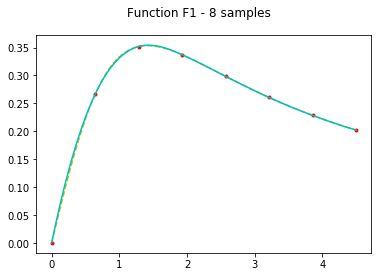

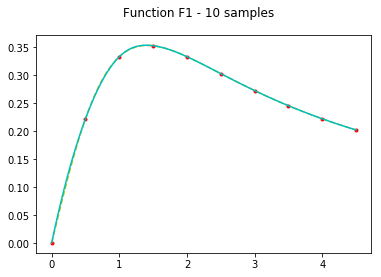

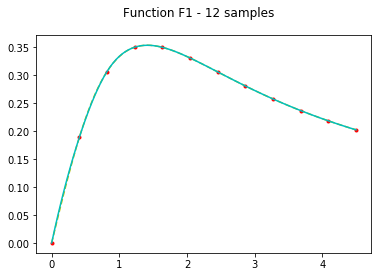

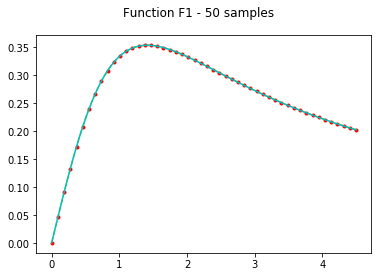

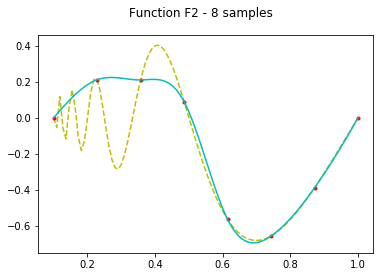

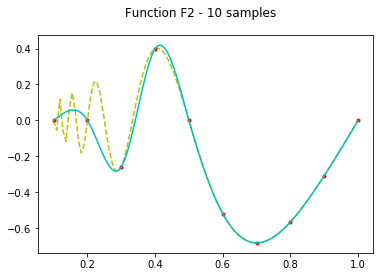

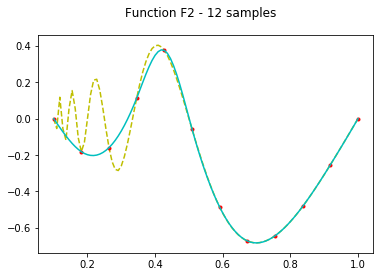

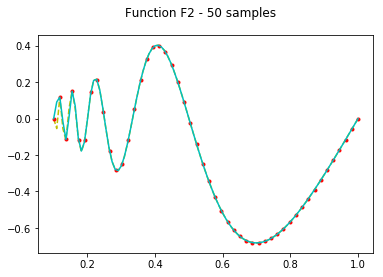

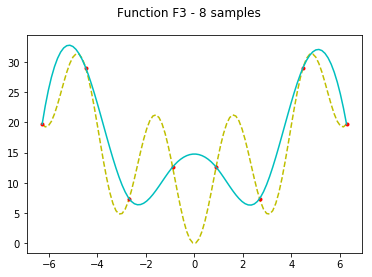

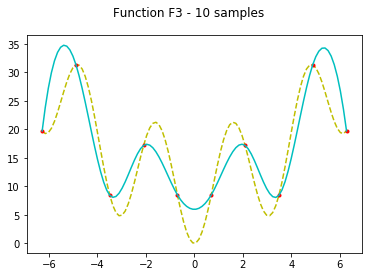

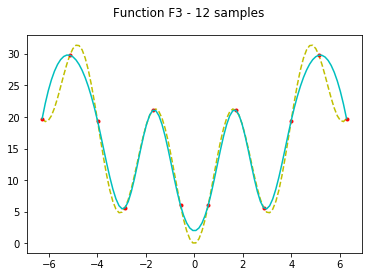

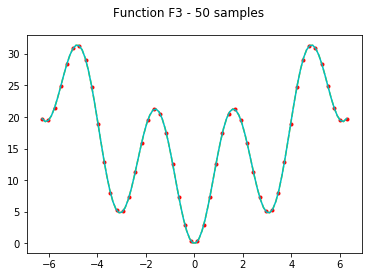

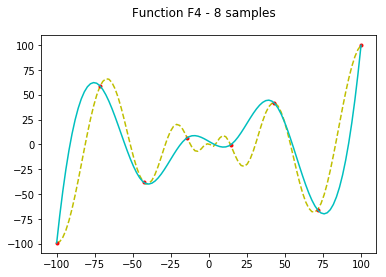

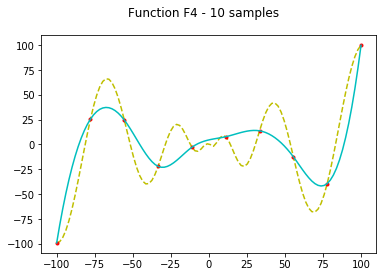

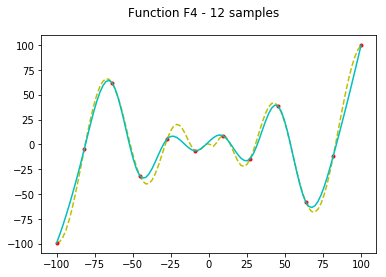

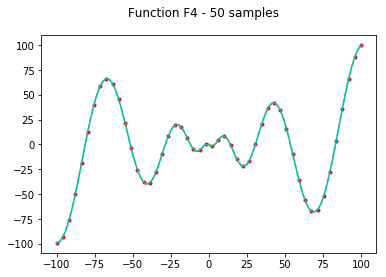

In [19]:
for f,d in FUNCTIONS:
    x = np.linspace(d[0], d[1], 100)
    
    # different configurations
    for n in SAMPLES:
        nodes = tabularize(f, d, n)
        interpolated = spline(nodes)

        # plot configuration
        plt.figure()
        plt.suptitle(f'Function {f.__name__} - {n} samples')

        # input function
        plt.plot(x, list(map(f, x)), 'y--')
        plt.plot(*zip(*nodes), 'r.')
        
        # spline
        plt.plot(x, list(map(interpolated, x)), 'c')

<span style='float: right'>Jan Gołda, AGH WIEiT 2018/19</span>